Step 1: Creating and loading the master dataset...
Dataset successfully created with 78 entries.
   pincode  district division  population  literacy_rate  latitude  longitude
0   190001  Srinagar  Kashmir     1236829          69.41     34.08      74.79
1   190002  Srinagar  Kashmir     1236829          69.41     34.08      74.79
2   190003  Srinagar  Kashmir     1236829          69.41     34.08      74.79
3   190004  Srinagar  Kashmir     1236829          69.41     34.08      74.79
4   190005  Srinagar  Kashmir     1236829          69.41     34.08      74.79

Step 2: Modeling Logistical Complexity Score...
Logistical Complexity Score calculated for each district.
     district  population  complexity_score  latitude  longitude
13      Reasi      314667           0.77516     33.31      75.86
1   Bandipora      392232           0.77488     34.42      74.65
4        Doda      409936           0.76740     33.08      74.83
9     Kupwara      870354           0.74196     34.42      74.22
10 

C:\Users\Shaista Syed\AppData\Local\Temp\ipykernel_1120\711290175.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_district.sort_values('complexity_score', ascending=False), y='district', x='complexity_score', palette='viridis', ax=ax)


Saved chart: complexity_by_district.png
Saved chart: opportunity_matrix.png
Saved interactive map: jk_logistics_map.html

Analysis complete. Check the folder for the output files.


C:\Users\Shaista Syed\AppData\Local\Temp\ipykernel_1120\711290175.py:177: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


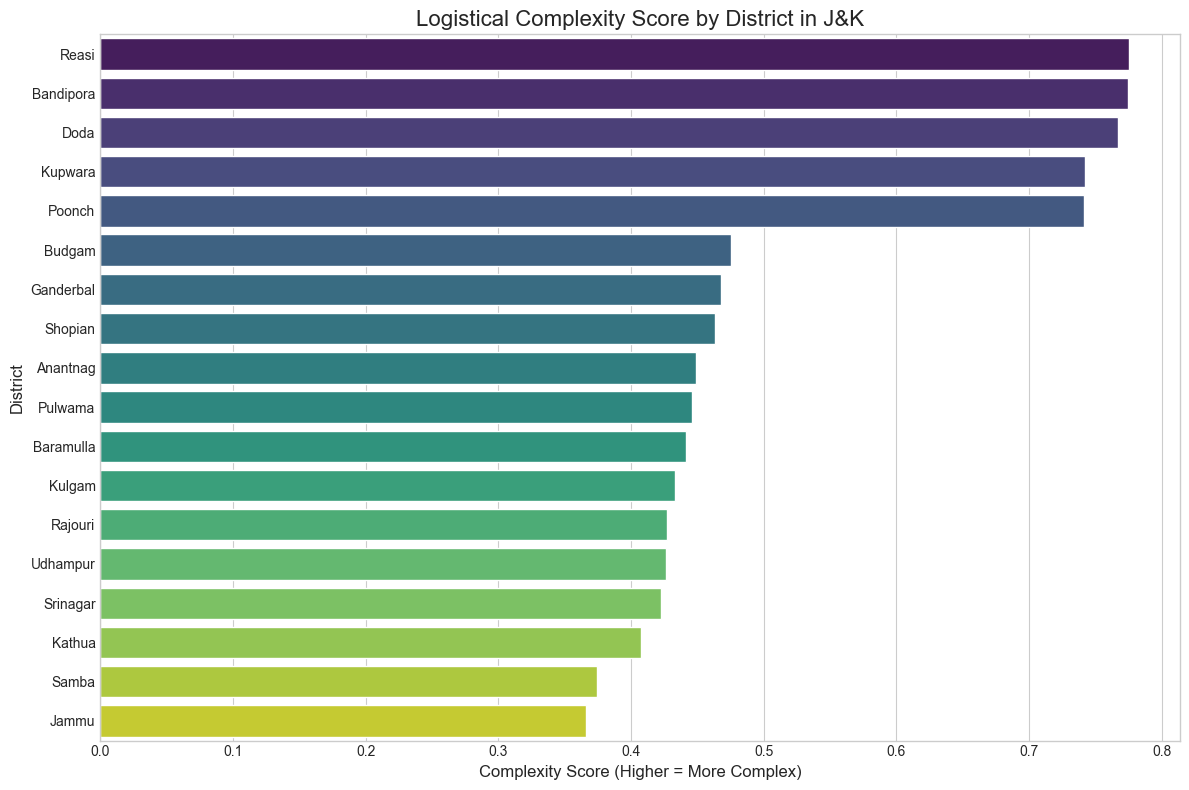

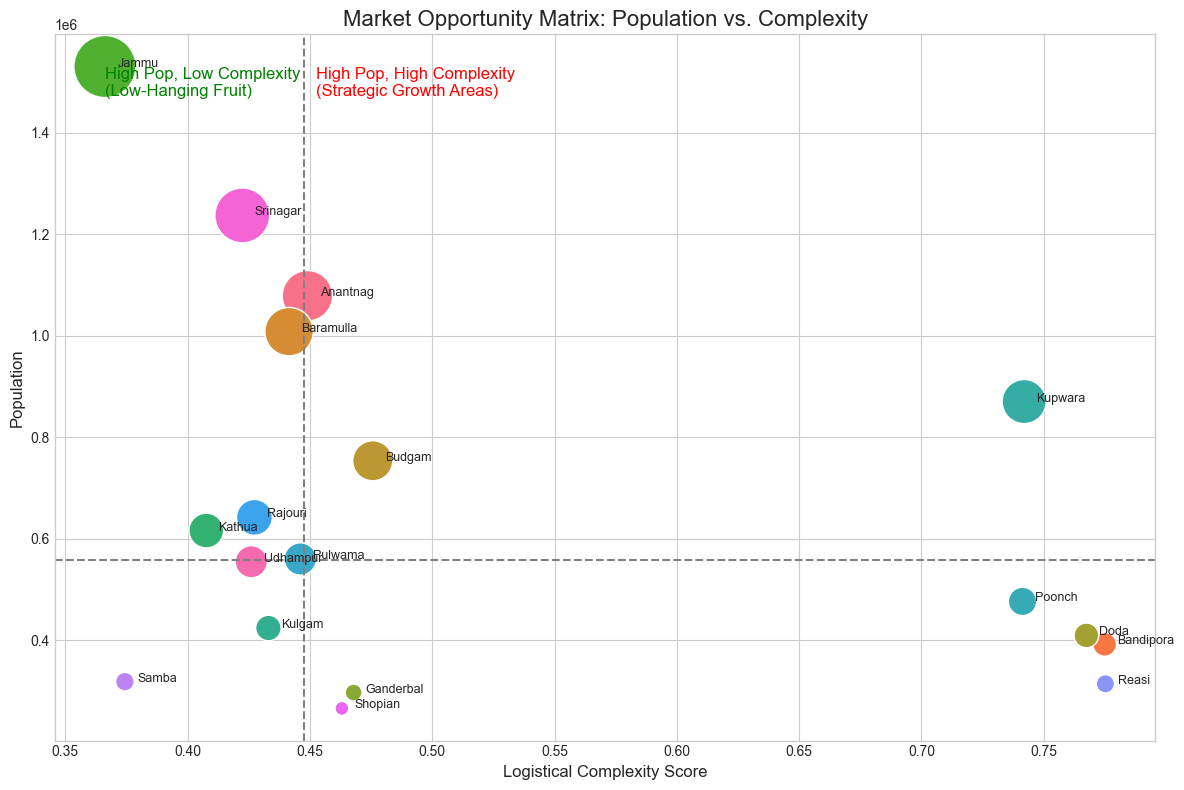

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.cm as cm

# --- Part 1: Data Aggregation and Profiling ---
# Create a comprehensive dataset of J&K pin codes, districts, and divisions.
# This data is compiled from various public sources.
print("Step 1: Creating and loading the master dataset...")

# NOTE: This is a representative sample of pin codes. A full list would be much larger.
# The length of lists 'pincode', 'district', and 'division' must be the same.
data = {
    'pincode': [
        190001, 190002, 190003, 190004, 190005, 190006, 190008, 190009, 190010,
        180001, 180002,
        192101, 192102, 192122, 192124, 192125, 192210, 192221, 192222, 192231, 192232,
        182101, 182102, 182121, 182141, 182142, 182143, 182144, 182145, 182148, 182201, 182202,
        182203, 182204, 182205, 182206,
        184101, 184102,
        185101, 185102, 185111, 185121, 185131, 185132,
        185135, 185151, 185152, 185153,
        185201, 185203, 185211, 185212,
        181101, 181102,
        191101, 191102,
        191111, 191112, 191121, 191122,
        191201, 191202,
        192301, 192303,
        192401, 192402, 192403,
        193101, 193102,
        193201,
        193221, 193222,
        181131, 181132, 181141, 181142,
        181151, 181152
    ],
    'district': [
        'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar', 'Srinagar',
        'Jammu', 'Jammu',
        'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag', 'Anantnag',
        'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur', 'Udhampur',
        'Doda', 'Doda', 'Doda', 'Doda',
        'Kathua', 'Kathua',
        'Rajouri', 'Rajouri', 'Rajouri', 'Rajouri', 'Rajouri', 'Rajouri',
        'Poonch', 'Poonch', 'Poonch', 'Poonch',
        'Reasi', 'Reasi', 'Reasi', 'Reasi',
        'Samba', 'Samba',
        'Budgam', 'Budgam',
        'Ganderbal', 'Ganderbal', 'Ganderbal', 'Ganderbal',
        'Pulwama', 'Pulwama',
        'Shopian', 'Shopian',
        'Kulgam', 'Kulgam', 'Kulgam',
        'Baramulla', 'Baramulla',
        'Kupwara',
        'Bandipora', 'Bandipora',
        'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu'
    ],
    'division': [
        'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir',
        'Jammu', 'Jammu',
        'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir',
        'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu',
        'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu',
        'Kashmir', 'Kashmir',
        'Kashmir', 'Kashmir', 'Kashmir', 'Kashmir',
        'Kashmir', 'Kashmir',
        'Kashmir', 'Kashmir',
        'Kashmir', 'Kashmir', 'Kashmir',
        'Kashmir', 'Kashmir',
        'Kashmir',
        'Kashmir', 'Kashmir',
        'Jammu', 'Jammu', 'Jammu', 'Jammu',
        'Jammu', 'Jammu'
    ]
}
df = pd.DataFrame(data)

# Enrich with district-level socio-economic and demographic data (2011 Census and estimates)
socio_economic_data = {
    'district': ['Jammu', 'Srinagar', 'Anantnag', 'Baramulla', 'Kupwara', 'Budgam', 'Kathua', 'Rajouri', 'Udhampur', 'Pulwama', 'Kulgam', 'Shopian', 'Bandipora', 'Poonch', 'Samba', 'Doda', 'Kishtwar', 'Ramban', 'Ganderbal', 'Reasi'],
    'population': [1529958, 1236829, 1078692, 1008039, 870354, 753745, 616435, 642415, 554985, 560440, 424483, 266215, 392232, 476835, 318898, 409936, 230696, 283713, 297446, 314667],
    'literacy_rate': [83.45, 69.41, 62.75, 64.63, 64.51, 56.08, 73.09, 68.17, 68.49, 63.48, 66.74, 59.23, 56.28, 64.68, 81.41, 58.15, 54.27, 64.99, 58.04, 56.21],
    # Coordinates for mapping (approximated to district center)
    'latitude': [32.73, 34.08, 33.73, 34.20, 34.42, 34.02, 32.38, 33.38, 32.93, 33.87, 33.77, 33.64, 34.42, 33.15, 32.65, 33.08, 33.35, 33.72, 34.23, 33.31],
    'longitude': [74.87, 74.79, 75.15, 74.34, 74.22, 74.67, 75.55, 74.30, 75.13, 74.83, 74.10, 75.02, 74.65, 75.57, 75.07, 74.83, 75.25, 74.83, 74.78, 75.86]
}
df_socio = pd.DataFrame(socio_economic_data)

# Merge the datasets
df_merged = pd.merge(df, df_socio, on='district', how='left')
print("Dataset successfully created with", len(df_merged), "entries.")
print(df_merged.head())


# --- Part 2: Logistics Complexity Modeling ---
# Model a "Logistical Complexity Score" based on known challenges.
# Higher score = more complex/difficult to service.
print("\nStep 2: Modeling Logistical Complexity Score...")

# Define weights for each factor
# These are subjective and based on research indicating infrastructure and development levels are key challenges.
W_LITERACY = 0.4  # Lower literacy can correlate with lower e-commerce adoption and digital literacy.
W_DEVELOPMENT = 0.6 # Proxy for infrastructure, based on research identifying 'less-developed' districts.

# Normalize literacy rate (inverted, so lower literacy = higher score)
df_merged['literacy_score'] = (1 - (df_merged['literacy_rate'] / 100))

# Identify 'less-developed' districts as per research to create a development score
# These districts are noted to have greater infrastructure and development challenges.
less_developed_districts = ['Kishtwar', 'Doda', 'Ramban', 'Poonch', 'Reasi', 'Kupwara', 'Bandipora']
df_merged['development_score'] = df_merged['district'].apply(lambda x: 1 if x in less_developed_districts else 0.5)

# Calculate the final weighted Logistical Complexity Score
df_merged['complexity_score'] = (
    (df_merged['literacy_score'] * W_LITERACY) +
    (df_merged['development_score'] * W_DEVELOPMENT)
)

# Aggregate at the district level for easier visualization
df_district = df_merged.groupby('district').agg({
    'population': 'first',
    'complexity_score': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

print("Logistical Complexity Score calculated for each district.")
print(df_district.sort_values(by='complexity_score', ascending=False).head())


# --- Part 3: Opportunity Analysis and Visualization ---
print("\nStep 3: Generating Visualizations...")

# 1. Bar Chart: Complexity Score by District
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_district.sort_values('complexity_score', ascending=False), y='district', x='complexity_score', palette='viridis', ax=ax)
ax.set_title('Logistical Complexity Score by District in J&K', fontsize=16)
ax.set_xlabel('Complexity Score (Higher = More Complex)', fontsize=12)
ax.set_ylabel('District', fontsize=12)
plt.tight_layout()
plt.savefig('complexity_by_district.png')
print("Saved chart: complexity_by_district.png")

# 2. Scatter Plot: Opportunity Matrix (Population vs. Complexity)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_district, x='complexity_score', y='population', hue='district', size='population', sizes=(100, 2000), legend=False, ax=ax)
ax.set_title('Market Opportunity Matrix: Population vs. Complexity', fontsize=16)
ax.set_xlabel('Logistical Complexity Score', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

# Annotate points for clarity
for i, row in df_district.iterrows():
    ax.text(row['complexity_score'] + 0.005, row['population'], row['district'], fontsize=9)

# Add quadrants
plt.axvline(df_district['complexity_score'].median(), color='grey', linestyle='--')
plt.axhline(df_district['population'].median(), color='grey', linestyle='--')
ax.text(df_district['complexity_score'].min(), df_district['population'].max(), 'High Pop, Low Complexity\n(Low-Hanging Fruit)', fontsize=12, color='green', verticalalignment='top')
ax.text(df_district['complexity_score'].median() + 0.005, df_district['population'].max(), 'High Pop, High Complexity\n(Strategic Growth Areas)', fontsize=12, color='red', verticalalignment='top')
plt.tight_layout()
plt.savefig('opportunity_matrix.png')
print("Saved chart: opportunity_matrix.png")

# 3. Interactive Map: Visualizing Complexity across J&K
# Create a base map centered on J&K
map_jk = folium.Map(location=[33.7782, 75.3412], zoom_start=7)

# Normalize complexity score for color mapping (0 to 1)
norm = plt.Normalize(df_district['complexity_score'].min(), df_district['complexity_score'].max())
cmap = cm.get_cmap('viridis')

# Add circles to the map, with size representing population and color representing complexity
for _, row in df_district.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        popup=f"<strong>District:</strong> {row['district']}<br>"
              f"<strong>Population:</strong> {row['population']:,}<br>"
              f"<strong>Complexity Score:</strong> {row['complexity_score']:.2f}",
        radius=row['population'] / 20, # Scale radius for visibility
        color=f"#{int(cmap(norm(row['complexity_score']))[0]*255):02x}{int(cmap(norm(row['complexity_score']))[1]*255):02x}{int(cmap(norm(row['complexity_score']))[2]*255):02x}",
        fill=True,
        fill_opacity=0.7
    ).add_to(map_jk)

map_jk.save('jk_logistics_map.html')
print("Saved interactive map: jk_logistics_map.html")
print("\nAnalysis complete. Check the folder for the output files.")

